# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [9]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  
import plotly.express as px

# Carregar o arquivo com o caminho fornecido
df = pd.read_csv(r"C:\Users\DELL\Documents\ebac\CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

# Exibir as primeiras 10 linhas do DataFrame
df.head(10)


,Unnamed: 0,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [10]:
# Verificar os tipos de dados
print(df.dtypes)

# Ajustar a coluna 'Income' para float (removendo caracteres desnecessários)
df['Income'] = df['Income'].str.replace('.', '').str.replace(',', '.').astype(float)


Unnamed: 0              int64
Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [12]:
# Verificar dados faltantes
print(df.isnull().sum())

df.fillna({'Age': df['Age'].median()}, inplace=True)


Unnamed: 0            0
Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [13]:
# Verificar valores únicos de variáveis categóricas
for col in ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']:
    print(f"Valores únicos em {col}: {df[col].unique()}")



Valores únicos em Gender: ['Female' 'Male']
Valores únicos em Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Valores únicos em Marital Status: ['Single' 'Married']
Valores únicos em Home Ownership: ['Rented' 'Owned']
Valores únicos em Credit Score: ['High' 'Average']


# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

       Unnamed: 0        Age         Income  Number of Children
count    10.00000  10.000000      10.000000           10.000000
mean      4.50000  34.800000   88500.000000            0.800000
std       3.02765   8.024961   34241.787337            1.135292
min       0.00000  25.000000   40000.000000            0.000000
25%       2.25000  30.250000   63750.000000            0.000000
50%       4.50000  33.000000   90000.000000            0.000000
75%       6.75000  38.750000  103750.000000            1.750000
max       9.00000  50.000000  150000.000000            3.000000


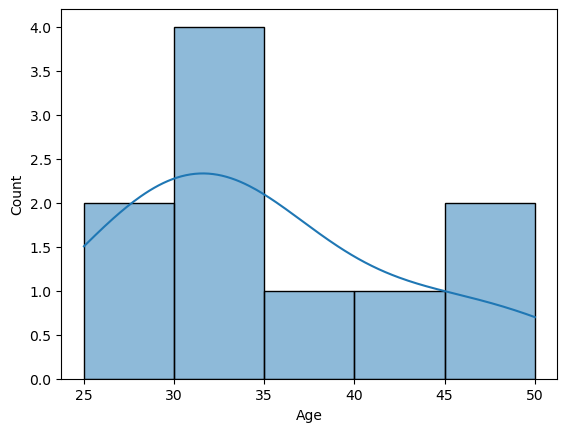

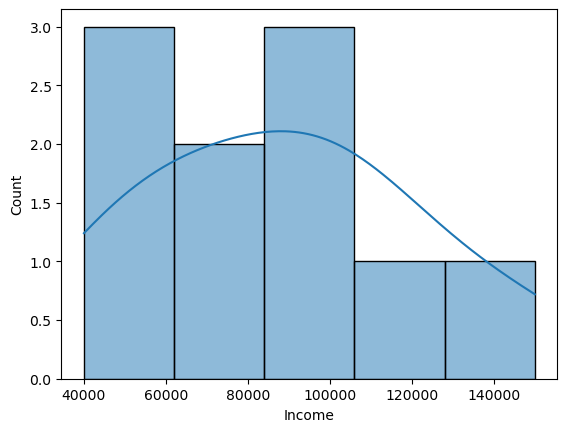

In [14]:
# Descrição estatística
print(df.describe())

# Gráficos de distribuição
sns.histplot(df['Age'], kde=True)
plt.show()

sns.histplot(df['Income'], kde=True)
plt.show()


**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

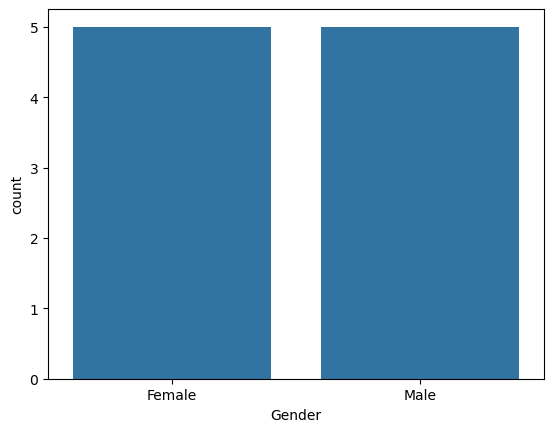

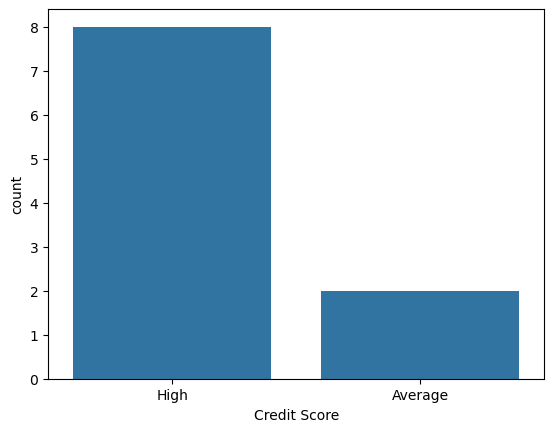

In [15]:
# Plotar gráficos de barras para variáveis categóricas
sns.countplot(x='Gender', data=df)
plt.show()

sns.countplot(x='Credit Score', data=df)
plt.show()


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

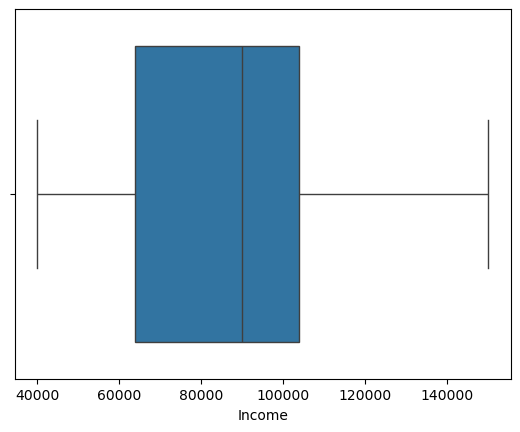

In [16]:
# Identificar outliers em 'Income'
sns.boxplot(x=df['Income'])
plt.show()

# Tratamento usando IQR
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]


**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



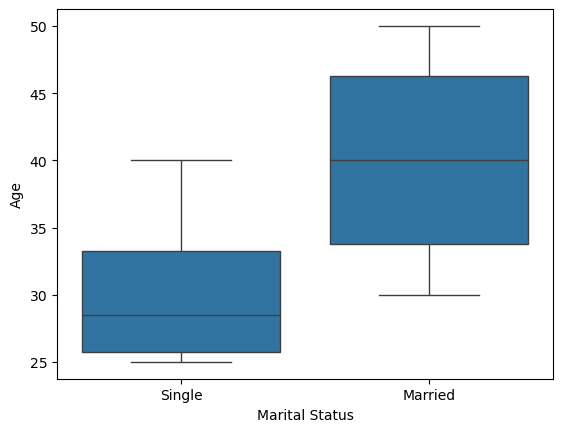

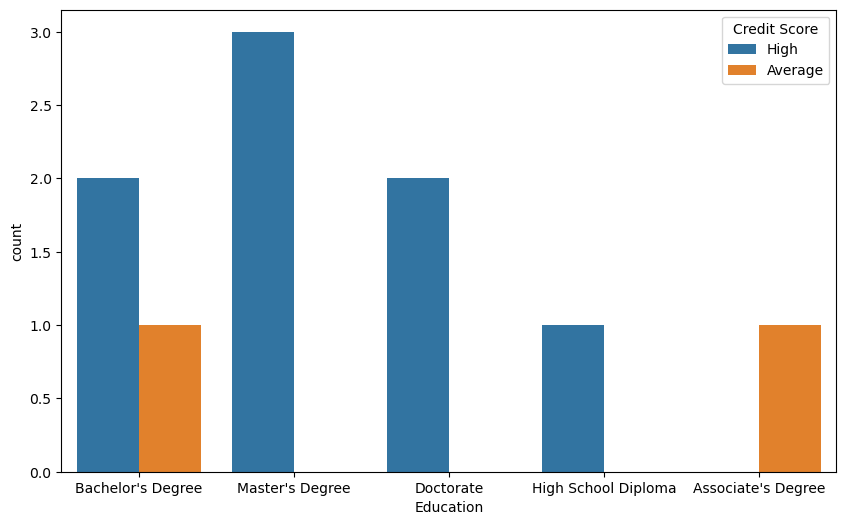

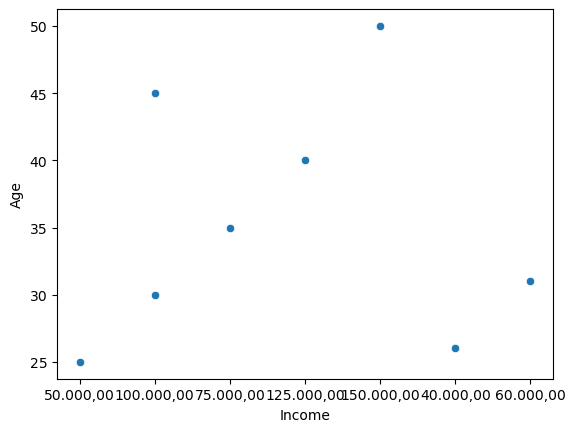

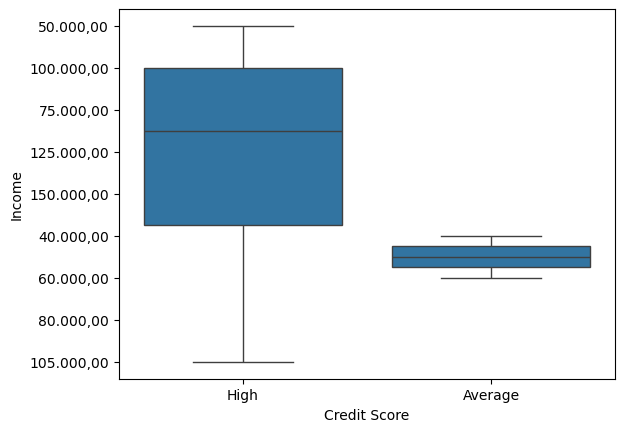

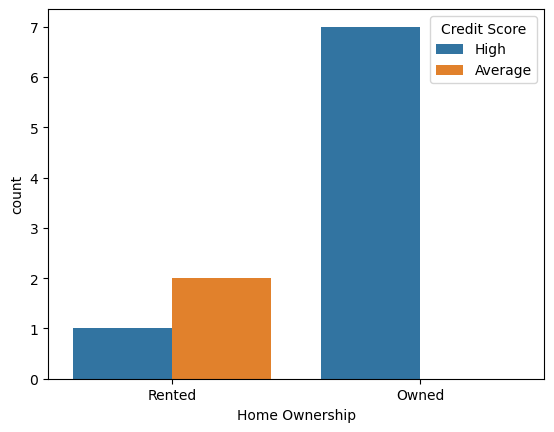

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = r"C:\Users\DELL\Documents\ebac\CREDIT_SCORE_PROJETO_PARTE1.csv"
df = pd.read_csv(file_path, delimiter=';')

# Idade e status civil
sns.boxplot(x='Marital Status', y='Age', data=df)
plt.show()

# Score de crédito e escolaridade (ajustado para evitar sobreposição)
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura
sns.countplot(x='Education', hue='Credit Score', data=df, dodge=True)  # Usando dodge=True para separar as barras
plt.show()

# Salário e idade
sns.scatterplot(x='Income', y='Age', data=df)
plt.show()

# Score de crédito e salário
sns.boxplot(x='Credit Score', y='Income', data=df)
plt.show()

# Tipo de residência e score
sns.countplot(x='Home Ownership', hue='Credit Score', data=df)
plt.show()





**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

 1. A quantidade de filhos impacta o Score de Crédito?
Hipótese: Clientes com mais filhos podem ter mais despesas e, portanto, maior probabilidade de ter um score mais baixo.

 2. Qual a distribuição de renda entre diferentes tipos de propriedade de residência?
Hipótese: Clientes com casa própria podem ter rendas mais altas, o que pode influenciar positivamente no Score de Crédito.




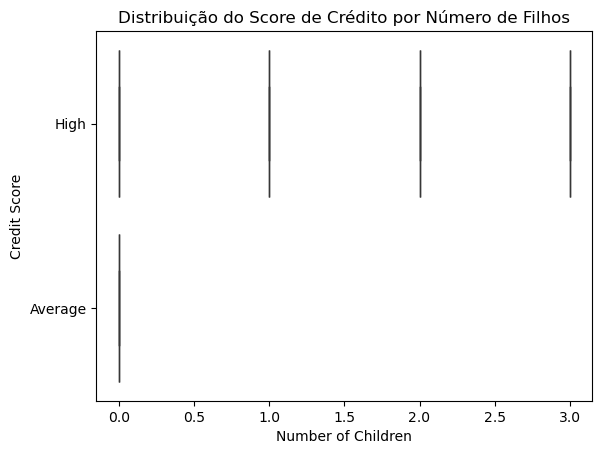

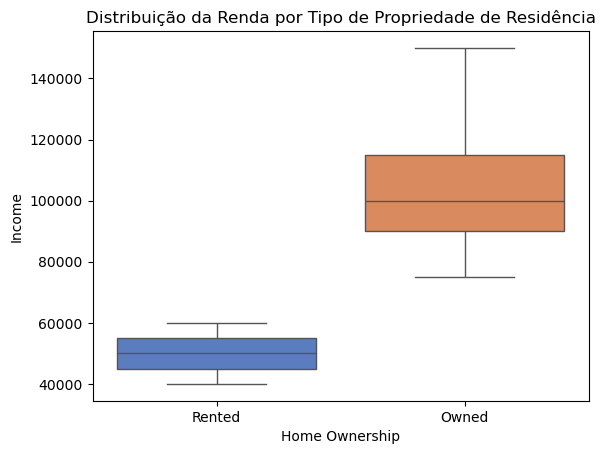

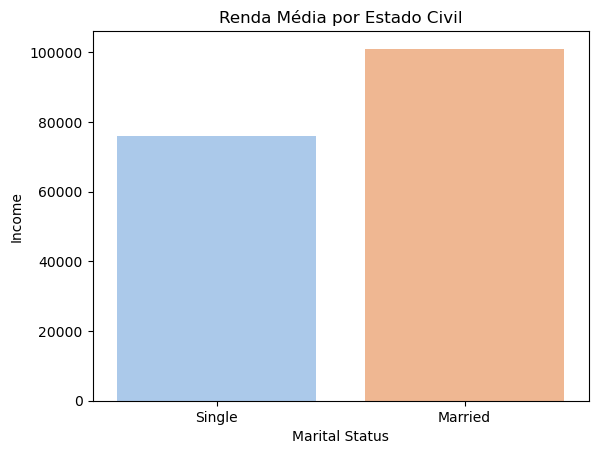

In [25]:
sns.boxplot(data=df, x='Number of Children', y='Credit Score', hue='Number of Children', palette='coolwarm', dodge=False)
plt.legend([], [], frameon=False)  # Remove a legenda indesejada
plt.title('Distribuição do Score de Crédito por Número de Filhos')
plt.show()

sns.boxplot(data=df, x='Home Ownership', y='Income', hue='Home Ownership', palette='muted', dodge=False)
plt.legend([], [], frameon=False)  # Remove a legenda indesejada
plt.title('Distribuição da Renda por Tipo de Propriedade de Residência')
plt.show()

sns.barplot(data=df, x='Marital Status', y='Income', hue='Marital Status', errorbar=None, palette='pastel', dodge=False)
plt.legend([], [], frameon=False)  # Remove a legenda indesejada
plt.title('Renda Média por Estado Civil')
plt.show()

   




# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

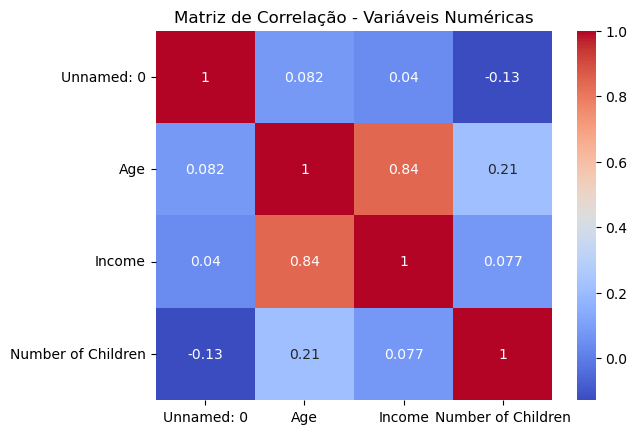

In [27]:
# Selecionar apenas colunas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Matriz de correlação
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [28]:
# Selecionar apenas colunas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Calcular a correlação entre as variáveis numéricas
correlation_matrix = numerical_df.corr()

# Mostrar a correlação
print(correlation_matrix)

# Identificar as variáveis com correlação alta (por exemplo, acima de 0.7 ou abaixo de -0.7)
high_correlation = correlation_matrix[correlation_matrix.abs() > 0.7]
print(high_correlation)


                    Unnamed: 0       Age    Income  Number of Children
Unnamed: 0            1.000000  0.082315  0.040191           -0.129302
Age                   0.082315  1.000000  0.841858            0.214644
Income                0.040191  0.841858  1.000000            0.077172
Number of Children   -0.129302  0.214644  0.077172            1.000000
                    Unnamed: 0       Age    Income  Number of Children
Unnamed: 0                 1.0       NaN       NaN                 NaN
Age                        NaN  1.000000  0.841858                 NaN
Income                     NaN  0.841858  1.000000                 NaN
Number of Children         NaN       NaN       NaN                 1.0


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [35]:
from sklearn.preprocessing import OneHotEncoder

# Identificar colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplicar OneHotEncoder para as variáveis categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Transformar as variáveis categóricas
encoded_data = encoder.fit_transform(df[categorical_cols])

# Criar um DataFrame com as variáveis transformadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Excluir colunas originais e adicionar as novas variáveis codificadas
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)




**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

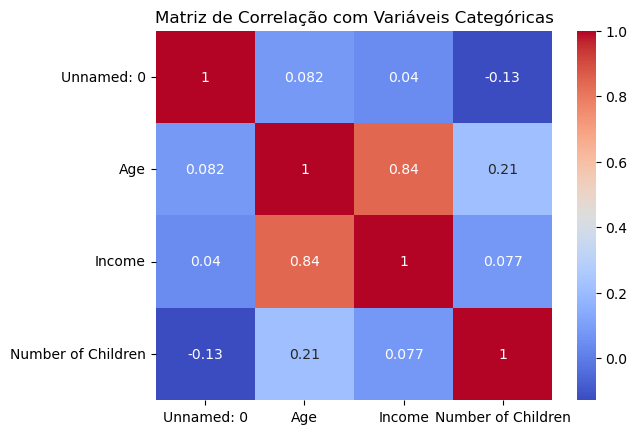

In [32]:
# Calcular a correlação com as variáveis categóricas
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação com Variáveis Categóricas')
plt.show()


**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [43]:
print(df.columns)
# Se a variável dependente for 'Income' ou outra válida
X = df.drop('Income', axis=1)  # Excluindo a coluna de target
y = df['Income']  # Definindo a variável dependente (target)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verifique as formas das bases
print(X_train.shape, X_test.shape)  # Verificando o shape dos dados








Index(['Age', 'Income', 'Number of Children'], dtype='object')
(8, 2) (2, 2)


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

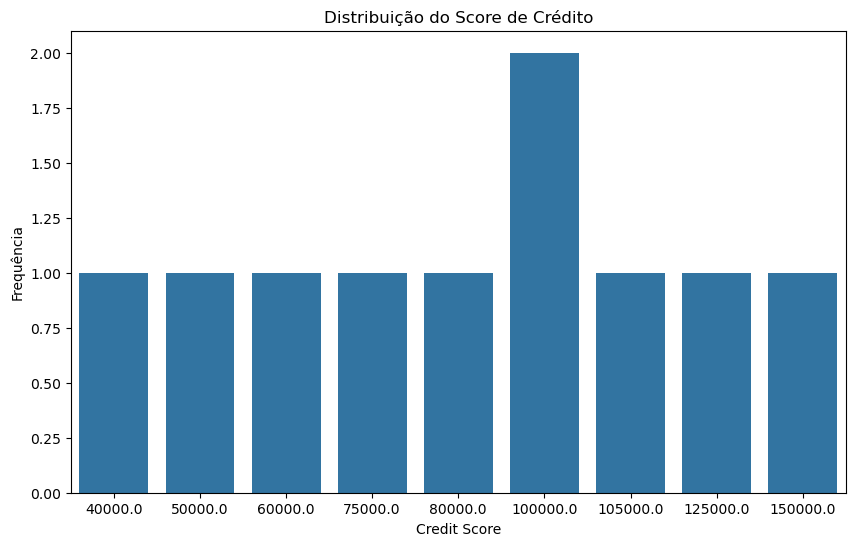

In [50]:
# Supondo que a variável dependente seja 'Income', mas você deve ajustá-la para o seu caso real
y = df['Income']  

import seaborn as sns
import matplotlib.pyplot as plt

# Verificar distribuição do Score de Crédito
plt.figure(figsize=(10, 6))  # Ajuste a largura e a altura conforme necessário
sns.countplot(x=y)
plt.title('Distribuição do Score de Crédito')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')
plt.show()







**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

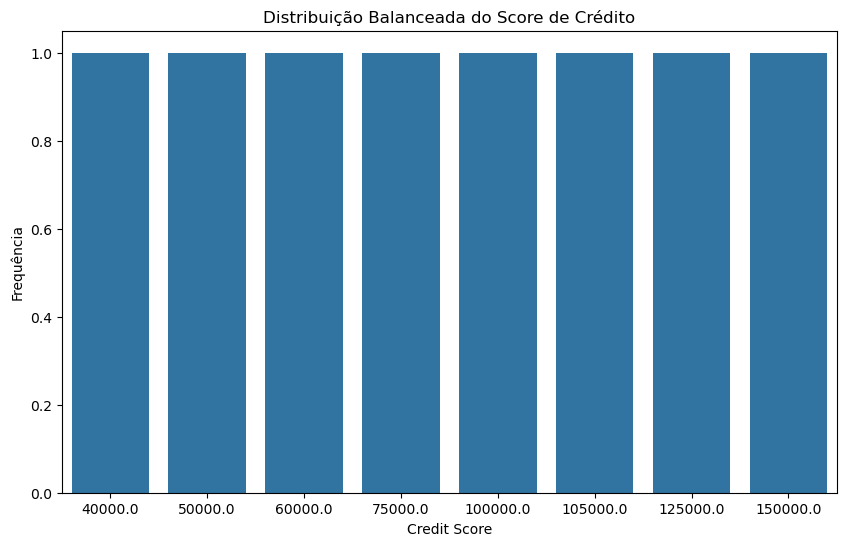

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df.drop(columns=['Income'])  # Ajuste para a variável dependente correta
y = df['Income']  # Ajuste para a variável dependente correta

# Dividir os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear os dados de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar a nova distribuição
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_res)
plt.title('Distribuição Balanceada do Score de Crédito')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')
plt.show()

